In [19]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#Harris_Detector

In [20]:
img = cv.imread('Eifell Tower.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

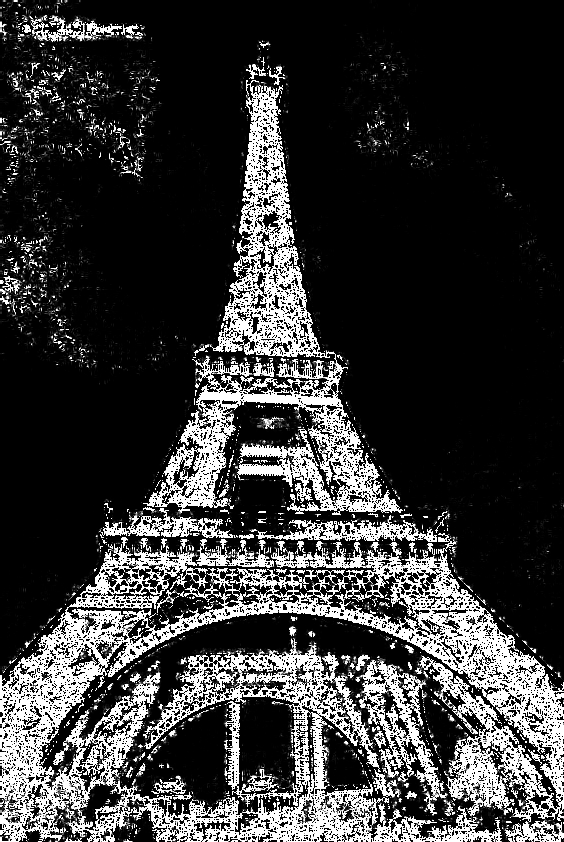

In [21]:
corner_img = cv.cornerHarris(gray,2,3,0.04)
#img, corner_neighber,sobel, Harris detector free parameter in the equation.
cv2_imshow(corner_img)
cv.waitKey(0)
cv.destroyAllWindows()

# 2: This parameter specifies the size of the neighborhood considered for corner detection.
# 3: It determines the size of the Sobel operator used to calculate the gradient of the image.

# 0.04: This parameter represents the free parameter, k, in the Harris corner detection algorithm.
#       It is used to balance the detection of corners based on the intensity variation and the detection of corners based on the local structure of the image. The value of 0.04 is a commonly used value that works well in many scenarios,
#       but it can be adjusted based on the specific application.

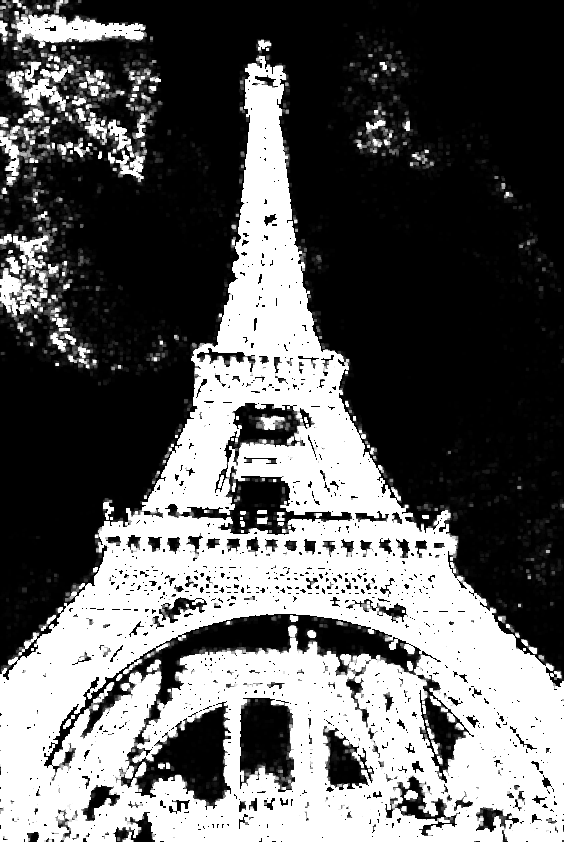

In [22]:
#result is dilated for marking the corners, not important
dilate_img = cv.dilate(corner_img,None)
cv2_imshow(dilate_img)
cv.waitKey(0)
cv.destroyAllWindows()

# None: in this case, None indicates that a default 3x3 rectangular structuring element will be used.
# Dilation is a morphological operation that expands the boundaries of regions in an image,
# often used to enhance or highlight features such as corners or edges.

In [23]:
img[dilate_img>0.5*dilate_img.max()]=[0,0,255]

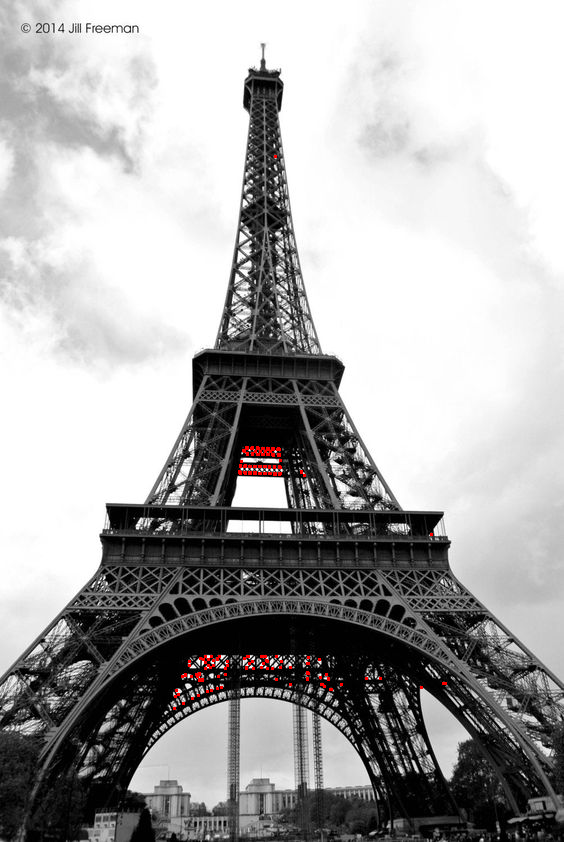

In [25]:
cv2_imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()

#Sift

In [26]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

In [33]:
img = cv.imread('Eifell Tower.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [34]:
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img)
cv.imwrite('sift_keypoints.jpg',img)


# It creates a SIFT detector object using cv.SIFT_create() function.
# It detects keypoints in a grayscale image gray using the detect() method of the SIFT detector.
# The None parameter indicates that no mask is used for filtering keypoints.
# It draws the detected keypoints on the original image img using the drawKeypoints() function.
# It saves the image with drawn keypoints as 'sift_keypoints.jpg' using cv.imwrite().
# Please note that there might be a couple of issues in the code snippet you provided.
# One thing to consider is that OpenCV version 4 and later has removed SIFT and other patented algorithms from its main distribution due to patent issues. Therefore, you might need to install the opencv-contrib-python package to access these algorithms

True

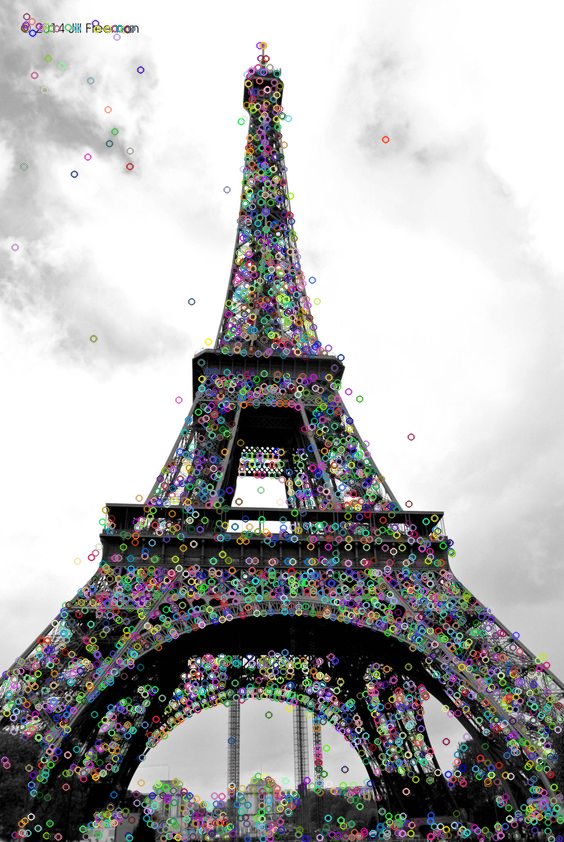

In [35]:
cv2_imshow(img)

#Matching

In [37]:
# Load your two images
image1 = cv.imread('sift.jpg', cv.IMREAD_GRAYSCALE)
image2 = cv.imread('sift2.jpg', cv.IMREAD_GRAYSCALE)

# Create SIFT detector
sift = cv.SIFT_create()

# Detect keypoints and compute descriptors for both images
kp1, des1 = sift.detectAndCompute(image1, None)
kp2, des2 = sift.detectAndCompute(image2, None)

# Create a Brute Force Matcher object
bf = cv.BFMatcher()

# Match descriptors
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw the matches
matching_result = cv.drawMatches(image1, kp1, image2, kp2, good_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Save the result
cv.imwrite('sift_matching_result.jpg', matching_result)

True

In [38]:
bf = cv.BFMatcher()

matches = bf.knnMatch(des1 , des2 , k=2)

good_matches = []

for m , n in matches:

  if m.distance < 0.75 * n.distance:

    good_matches.append(m)

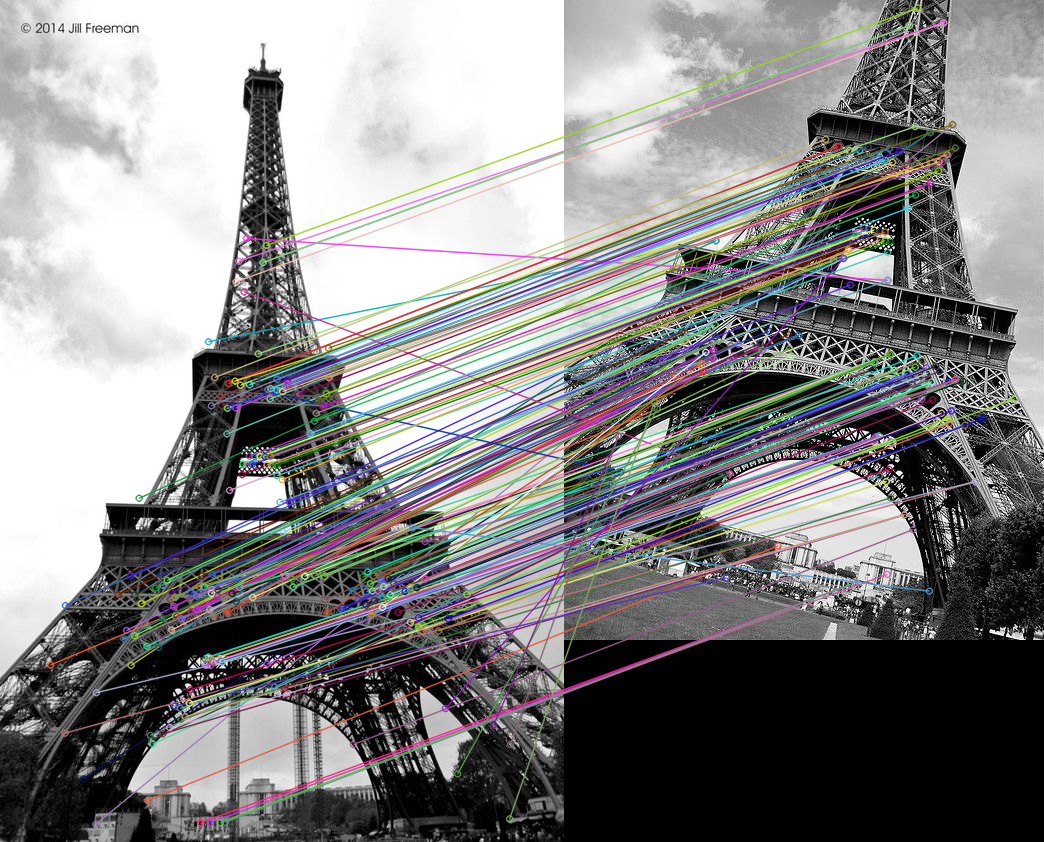

In [39]:
matching_result = cv.drawMatches(image1, kp1, image2, kp2, good_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


cv2_imshow(matching_result)

In [40]:
cv.imwrite('sift_matching_result.jpg', matching_result)

True